In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, ROOT

import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

plt.rcParams["figure.figsize"] = (12, 8)

try :
    import os
    os.mkdir("images")
except:
    pass

Welcome to JupyROOT 6.26/06


In [18]:
# reformats the purity and stability plots that Barak made in ROOT,
# so that they match the matplotlib style of the rest of the paper
f=ROOT.TFile.Open("purity_stability_hists.root")
f.GetListOfKeys().At(1).GetName()

purity_stability_hists.root


'h1_2'

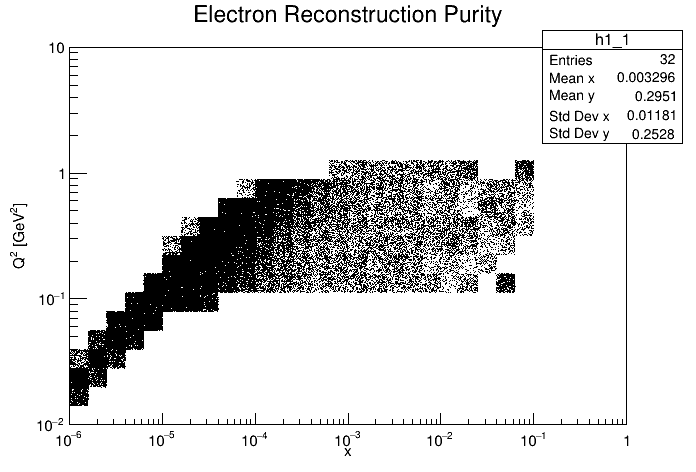

In [28]:
c=ROOT.TCanvas()
c.SetLogy()
c.SetLogx()
f.h1_1.Draw()
c.Draw()


In [80]:
def reformatTH2D(rootHist,zlabel=None, **arg):
    nbinsX=rootHist.GetXaxis().GetNbins()
    x=[rootHist.GetXaxis().GetBinLowEdge(i+1) for i in range(nbinsX)] + [rootHist.GetXaxis().GetBinUpEdge(nbinsX-1)]
    nbinsY=rootHist.GetYaxis().GetNbins()
    y=[rootHist.GetYaxis().GetBinLowEdge(i+1) for i in range(nbinsY)] + [rootHist.GetYaxis().GetBinUpEdge(nbinsY-1)]
    vals=np.zeros((nbinsY, nbinsX))
    #print(x,y)
    for i in range(nbinsX):
        for j in range(nbinsY):
            val=rootHist.GetBinContent(i+1,j+1)
            vals[j][i]=val
            #print(vals[j][i]-val, val)
            #print(np.max(vals))
    import matplotlib as mpl
    cmap = mpl.cm.get_cmap("viridis").copy()

    cmap.set_under(color='white')
    
    cmesh = plt.pcolormesh(x,y,vals, ec='face', cmap=cmap, **arg)
    
    
    cb=plt.colorbar(cmesh, label=zlabel)
    
   

    plt.title(rootHist.GetTitle())
    plt.xlabel(rootHist.GetXaxis().GetTitle())
    plt.ylabel(rootHist.GetYaxis().GetTitle())
    

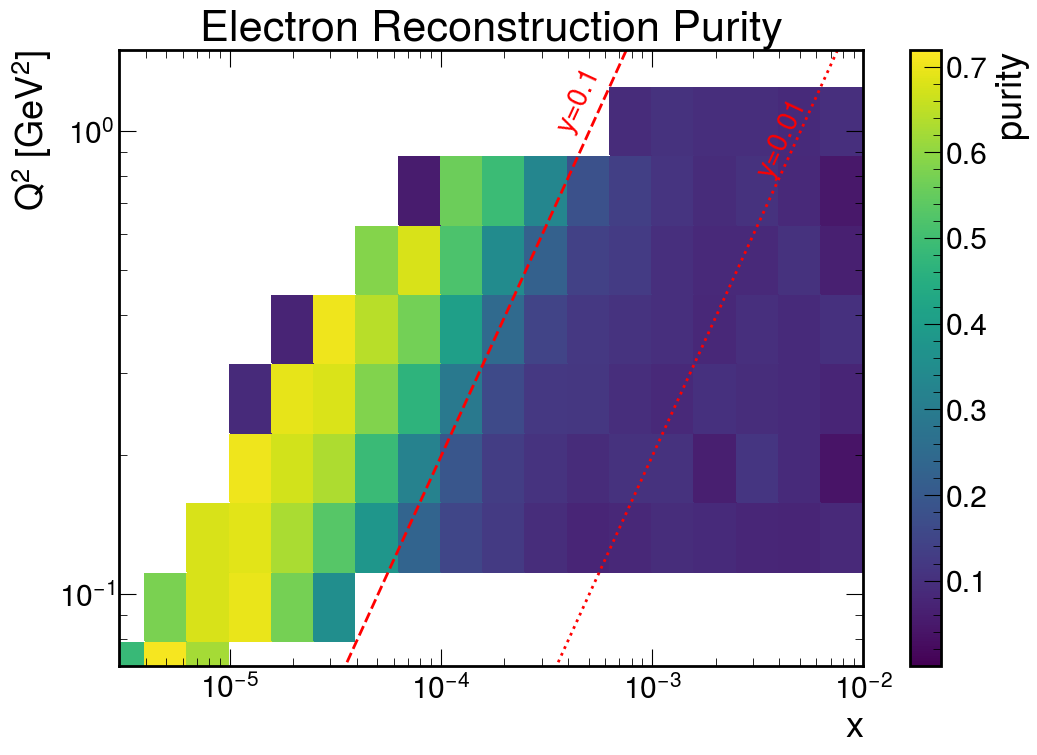

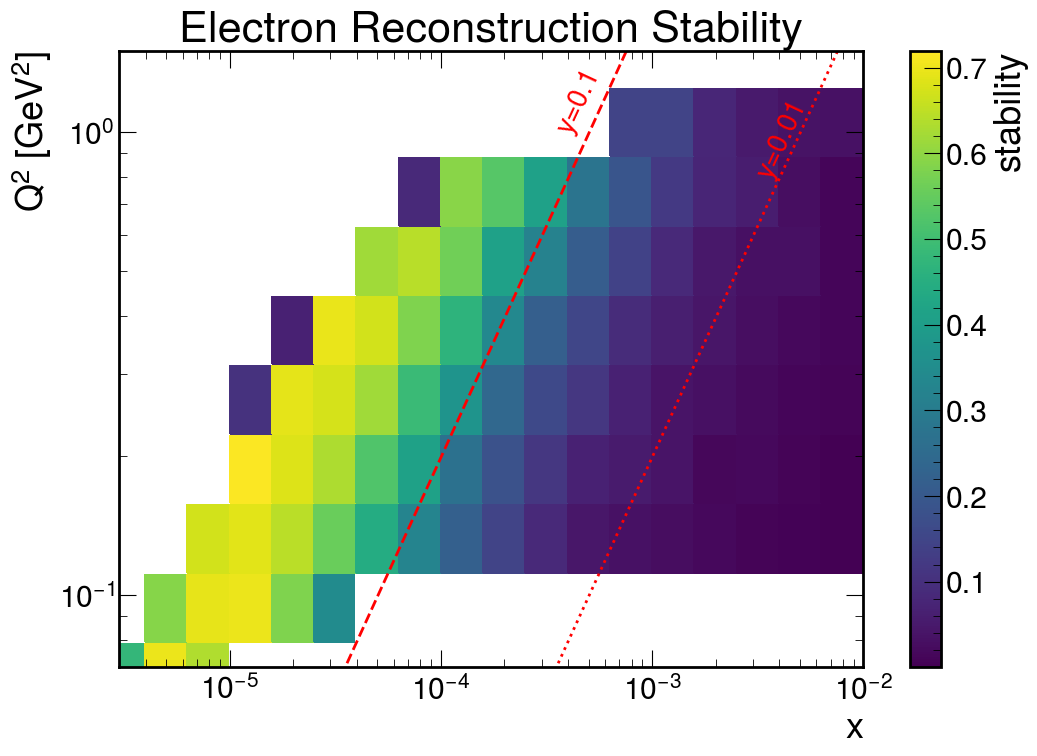

In [104]:
def postFormatting():
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel('$Q^2$ [GeV$^2$]')
    plt.xlim(3e-6, 1e-2)
    plt.ylim(7e-2, 1.5e0)
    #Q2=sxy
    
    slope=4*18*275*.1
    x=np.array([1e-6, 1e-2])
    plt.plot(x, x*slope, color='r', ls='--', lw=2)
    plt.text(3.4e-4, 1, "y=0.1", color='r', rotation=65,fontsize=20)
    
    slope=4*18*275*.01
    x=np.array([1e-6, 1e-2])
    plt.plot(x, x*slope, color='r', ls=':', lw=2)
    plt.text(3e-3, 0.8, "y=0.01", color='r', rotation=65,fontsize=20)
    
#     slope=4*18*275*.95
#     x=np.array([1e-6, 1e-2])
#     plt.plot(x, x*slope, color='r', ls=':', lw=2)
    
    
import matplotlib.colors as colors
reformatTH2D(f.h1_1, vmin=0.001, vmax=0.72, zlabel='purity')#, norm=colors.LogNorm(vmin=0.01, vmax=1))
postFormatting()
plt.savefig("images/purity.pdf")
plt.show()
reformatTH2D(f.h1_2, vmin=0.001, vmax=0.72, zlabel="stability")#, norm=colors.LogNorm(vmin=0.01, vmax=1))
postFormatting()
plt.savefig("images/stability.pdf")

plt.show()